<a href="https://colab.research.google.com/github/priyam3198/stats-playground/blob/main/Monte_Carlo_Simulation_Dice_Roll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import random
import matplotlib.pyplot as plt

In [114]:
def generateRandomNumber(array):
  #Generate Random Number from the given array.
  rand_idx = random.randrange(len(array))
  random_num = array[rand_idx]
  return random_num


In [115]:
def valueEarned(array):
  #Value of number between 1-5 is 10 and value of number 6 is -50

  if generateRandomNumber(array) == 6:
    return -50
  else:
    return 10




In [116]:
def mostFrequentNumber(arr):
    # Create an empty dictionary to store element counts
    element_count = {}

    # Iterate through the array and count element occurrences
    for element in arr:
        if element in element_count:
            element_count[element] += 1
        else:
            element_count[element] = 1

    # Find the element with the highest count
    most_frequent = None
    max_count = 0
    for element, count in element_count.items():
        if count > max_count:
            most_frequent = element
            max_count = count

    return most_frequent

In [117]:
def median(arr):
    # Create a sorted copy of the original array
    sorted_arr = sorted(arr)

    # Find the length of the sorted array
    n = len(sorted_arr)

    # Check if the sorted array has an odd or even number of elements
    if n % 2 == 1:
        # If the number of elements is odd, return the middle element
        return sorted_arr[n // 2]
    else:
        # If the number of elements is even, return the average of the two middle elements
        middle1 = sorted_arr[n // 2 - 1]
        middle2 = sorted_arr[n // 2]
        return (middle1 + middle2) / 2

In [118]:
def plotLineChart(data_values, x_label="Iteration", y_label="Value", title="Line Chart",horizontal_lines=None):
    """
    Plot a line chart from a list of data values.

    Parameters:
        data_values (list): List of values to plot on the y-axis.
        x_label (str): Label for the x-axis (default: "Iteration").
        y_label (str): Label for the y-axis (default: "Value").
        title (str): Title of the chart (default: "Line Chart").
        horizontal_lines (list): List of y-values for horizontal lines like median, most frequent value etc(default: None).
    """
    # Generate x-values as a range of integers from 1 to the length of data_values.
    x_values = range(1, len(data_values) + 1)

    # Create the line chart.
    #fig = plt.figure(figsize=(10, 5))
    plt.plot(x_values, data_values, linestyle='-')

    # Add labels and title.
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    default_colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']

    if horizontal_lines is not None:
        for i, line_value in enumerate(horizontal_lines):
            # Use a distinct color or cycle through the default_colors list.
            line_color = default_colors[i % len(default_colors)]
            plt.axhline(y=line_value, color=line_color, linestyle='--', label=f'Horizontal Line at {line_value}')


    # Display the chart.
    plt.grid(True)
    plt.legend()


In [119]:
def gameLoop(array,n=100):
  sum = 0
  sumArray = []
  expectedValues = []
  for i in range(n):
    sum = sum + valueEarned(array)
    expectedValue = sum/(i+1)
    expectedValues.append(expectedValue)
    sumArray.append(sum)
  medianValue =median(sumArray)
  mostFrequentValue = mostFrequentNumber(sumArray)
  print('Median Value: {0}'.format(medianValue))
  print('Most Frequent Value: {0}'.format(mostFrequentValue))
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  plt.sca(axes[0])
  plotLineChart(sumArray, x_label="Iteration", y_label="Value", title="Value Earned",horizontal_lines = [medianValue,mostFrequentValue])
  plt.sca(axes[1])
  plotLineChart(expectedValues, x_label="Iteration", y_label="Expected Value", title="Expected Value - Monte Carlo Simulation",horizontal_lines = None)
  plt.show()
  return sum


Median Value: 120.0
Most Frequent Value: 90


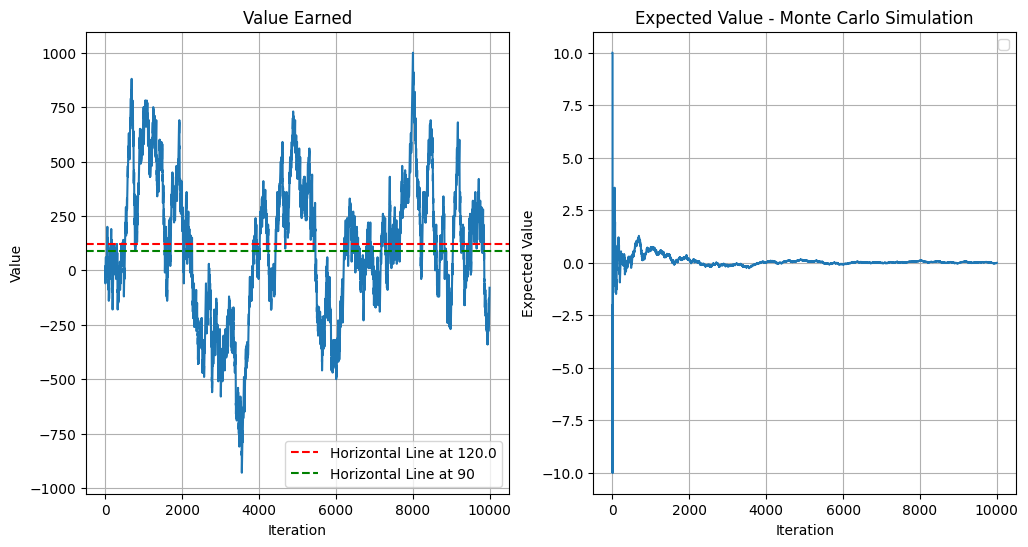

-80

In [120]:
array = [1,2,3,4,5,6]
gameLoop(array,n=10000)